<a href="https://colab.research.google.com/github/paudelsushil/adleosus/blob/main/assignment2_sus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/agroimpacts/adleo/blob/devel/assignments/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: CNNs

## Instructions

To submit the assignment, you will need to use GitHub and the existing private repository you already created called `adleoxyz` (xyz is your initials)

Once you have completed the assignment:
- Commit your notebook from colab to your private GitHub repo
- The notebook should be named assignment2_xyz.ipynb, with xyz again replaced by your initials.

## Answers to the theoretical questions

Please provide your answers to questions 1-5



### Q1.

In an image classification task, detecting the presence of a pattern is more important than the specific location of that pattern, i.e. we want to be able to detect the pattern regardless of where it is in the image. What is the name for this property? How can a model possess this property?

<p align="center">
  <img src="https://miro.medium.com/max/698/1*onNWaClQeEOzYkLIIymF6Q.png" />
</p>

(4 points)




---


**Answer to Q1**:

*The name of this property is* **Invariance or equivariance.**

A model possess this property by processing the information at multiple scales,

> starting by finding relationships among immediately neighbouring input values, and then progressively aggregating these in deep layers of the network to learn patterns across larger scales  






--





### Q2.
As we saw in the first question from Assignment 1, when the number of input bands or the units in the hidden layers increase, the number of parameters increases dramatically, since the weight matrix has size `(W × H × C) × D`, where `D` is the number of outputs (hidden units).

Suppose we want to train a network that takes a W × H × C image as input:

<ol type="A">
  <li>What is the number of trainable parameters if we pass this image chip through a <a href="https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#conv2d"><code>torch.nn.Conv2d()</code></a> layer with the <code>kernel_size=f×f</code> and number of <code>out_channels=D</code>, considering the <code>stride=2</code> and <code>padding=3</code>? (3 points)
  
  In answering the question, use 28, 28, 3, 7 for W, H, C, and D, respectively, and 5 for f. </li>
  <li>What is the shape of the weight and bias for our conv2d layer? (please explain your logic) (3 points)</li>
  <li>What would be the computational cost of our conv2d layer? (3 points)
  
  **Hint:** Computational cost refers to the total number of operations, which is different from the number of trainable parameters.

  </li>
</ol>





---


**Answer to Q2**

A. The total number of trainable parameters = 532.

B. The shape of the weight and bias for our conv2d layer are as follows:

**Weight shape: [7, 3, 5, 5]**

**Bias shape: [7]**

 The shape of the weight is determined by the number of output channels(D), number of input channels(C), and kernel size(f, f). **[D, C, f, f]**

 The shape of the bias tensor is determined solely by the number of output channels. **[D]**

C. Computational Cost = 252,262.50


---



### Q3.

<ol type="A">
  <li>In a CNN, if a *1x1 convolution* is applied to a feature map of size 28x28x192 with 32 filters, followed by a *2x2 max pooling layer* with a *stride of 2*, what will be the dimensions of the output feature map? Please justify your answer. (2 points)</li>
  <li>Explain how a 1 by 1 convolution can be considered to be an MLP? (2 points)</li>
</ol>



**Answer to Q3**

A. After applying 1X1 convolution to a feature map of size 28X28X192, the number of channels(192) are equals to number of filters which are 32. Then, applying 2X2 max pooling with a stride of 2 to [28X28X32], the final dimensions of the output feature map are [14X14X32].  

B. As 1X1 convolution has unique properties, which can be used for dimensionality reduction,  efficient low-dimensional embeddings, and applying non-linearity after convolutions.
It maps an input pixel with all its channels to an output pixel, which can be squeezed to a desired output depth. Thus, it can be considered as MLP looking at a particular pixel location.

### Q4.

Given the following:

1. An input of size 64x64x100, which is passed through a 2d convolution layer with 192 filters with a 5x5 kernel size, *same* padding, and a stride of 1.
2. The same input 64x64x100, which is first passed through a 1x1 2d conv layer with unit stride (stride of 1), reducing the dimensionality to 10 features, and then passed through the same 5x5 conv layer in the first part of the question.

Using the formula you already used to calculate both the number of trainable parameters and the computational cost of our conv layer, please calculate how much option b saves relative to option a in terms of:

<ol type="A">
  <li>Trainable parameters (2 points)</li>
  <li>Computational costs (2 points)</li>
</ol>



**Hint:** To answer this question, you will need to calculate the values for option 1 first, in which you calculate the total number of trainable parameters and total computational cost, and then again with option 2 for both the 1d convolution step and the following 5x5 conv layer, Then calculate the ratio of the two cases (original:dimensionality reduced).



---


**Answer to Q4**

A.

B.

---



### Q5.

What are the Arcitectural novelties introduced in each of these family of models? VGG, GoogLeNet (also known as inception) and ResNet.

**Hint:** Think about the motivation behind each design like what type of issues it tries to solve and how.

(4 points)



```
# This is formatted as code
```



---


**Answer to Q5**

---

VGG emphasized the importance of depth, ResNet addressed challenges in training very deep networks through residual learning and skip connections, and GoogLeNet introduced inception modules for efficient feature extraction.

## Coding assignment 1

Follow the instructions below to complete your coding assignment. (15 points)

### Static code 1

Run the following cells unchanged

#### Mount drive and run imports

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

from IPython.core.debugger import set_trace

#### Variables to set

Model save path: Modify 'save_dir' to the path to your already downloaded MNIST dataset (from assignment 1).

In [8]:
save_dir = "/content/gdrive/MyDrive/adleo/data"

### Static code 2

### Transforms and loads (Steps 1.1-1.5)

#### Necessary transforms - run unchanged


In [9]:
mnist_mean = 0.13066048920154572
mnist_std = 0.30810779333114624

train_transforms = transforms.Compose(
    [transforms.RandomRotation(5, fill=(0,)),
     transforms.RandomCrop(28, padding=2),
     transforms.ToTensor(),
     transforms.Normalize(mean=[mnist_mean], std=[mnist_std])]
     )

test_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=[mnist_mean], std=[mnist_std])]
     )

#### Load and split

In [10]:
train_data = datasets.MNIST(root=save_dir,
                            train=True,
                            download=False,
                            transform=train_transforms)

test_data = datasets.MNIST(root=save_dir,
                           train=False,
                           download=False,
                           transform=test_transforms)

train_ratio = 0.9

n_train_examples = int(len(train_data) * train_ratio)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(train_data,[n_train_examples,
                                                       n_valid_examples])

valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

#### Make iterable

In [11]:
# define batch size first
train_bsize = 54   # training batch size--can change for optional part

In [12]:
# Don't change this cell
train_loader = data.DataLoader(train_data,
                               shuffle=True,
                               batch_size=train_bsize)

valid_loader = data.DataLoader(valid_data,
                               shuffle=False,
                               batch_size=train_bsize)

test_loader = data.DataLoader(test_data,
                              shuffle=False,
                              batch_size=train_bsize)

### Metrics and some other necessary functions

In [13]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc


def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = Variable(x).to(device)
        y = Variable(y).to(device)

        y_pred = model(x)

        loss = criterion(y_pred, y)
        acc = calculate_accuracy(y_pred, y)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    # Disable automatic differentiation as we don't do optimization on eval.
    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = Variable(x).to(device)
            y = Variable(y).to(device)

            y_pred = model(x)

            loss = criterion(y_pred, y)
            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

def plot_confusion_matrix(labels, pred_labels):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(labels, pred_labels)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc


### Task 1: Create your CNN model

Using the blueprint and starter code provided in the CNN practical, section 4.1, for LeNet, create your `MyLetNet` model. The starter code is provide in the cell below.  Please complete it.

In [14]:
class myLeNet(nn.Module):
    def __init__(self, in_dim, num_classes):
        super(myLeNet, self).__init__()

        # Feature extraction part
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_dim, 6, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Classification part
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(inplace=True),
            nn.Linear(120, 84),
            nn.ReLU(inplace=True),
            nn.Linear(84, num_classes)
        )

    def forward(self, x):
        # set_trace()
        conv1 = self.conv1(x)
        conv2 = self.conv2(conv1)

        # Flatten before passing through the fully connected layers
        x = conv2.view(x.size(0), -1)

        predict = self.classifier(x)
        return predict

Define the parameters needed to run the model

In [15]:
in_dim = 1
initial_lr = 0.001    # Hyper-parameter that you can change for optional part
num_epochs = 10    # Hyper-parameter that you can change for optional part

# new variables
num_classes = 10

### Task 2: Show your work

Run and print the model

In [16]:
# Don't change this cell
model = myLeNet(in_dim, num_classes=num_classes)
print(model)

myLeNet(
  (conv1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


Show the number of parameters in the model

In [17]:
# Don't change this cell
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 61,706 trainable parameters


Optimizer, loss criterion, and GPU/CPU switch

In [18]:
optimizer = optim.Adam(model.parameters(), lr=initial_lr)
criterion = nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

Train the model

In [19]:
best_val_loss = float('inf')
train_loss_per_epoch = []
val_loss_per_epoch = []
epoch_counter = []

for epoch in trange(num_epochs):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_loader, optimizer, criterion,
                                  device)
    val_loss, val_acc = evaluate(model, valid_loader, criterion, device)

    #simple implementation of early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_mlp_tutorial.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {val_loss:.3f} |  Val. Acc: {val_acc*100:.2f}%')

    epoch_counter.append(epoch)
    train_loss_per_epoch.append(train_loss)
    val_loss_per_epoch.append(val_loss)

  0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 27s
	Train Loss: 0.351 | Train Acc: 88.74%
	 Val. Loss: 0.083 |  Val. Acc: 97.50%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 27s
	Train Loss: 0.110 | Train Acc: 96.60%
	 Val. Loss: 0.058 |  Val. Acc: 98.13%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 34s
	Train Loss: 0.080 | Train Acc: 97.52%
	 Val. Loss: 0.058 |  Val. Acc: 98.07%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 26s
	Train Loss: 0.068 | Train Acc: 97.91%
	 Val. Loss: 0.045 |  Val. Acc: 98.50%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 27s
	Train Loss: 0.060 | Train Acc: 98.14%
	 Val. Loss: 0.044 |  Val. Acc: 98.64%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 27s
	Train Loss: 0.055 | Train Acc: 98.29%
	 Val. Loss: 0.039 |  Val. Acc: 98.88%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 27s
	Train Loss: 0.051 | Train Acc: 98.41%
	 Val. Loss: 0.039 |  Val. Acc: 98.88%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 27s
	Train Loss: 0.046 | Train Acc: 98.53%
	 Val. Loss: 0.039 |  Val. Acc: 98.84%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 28s
	Train Loss: 0.044 | Train Acc: 98.58%
	 Val. Loss: 0.030 |  Val. Acc: 99.11%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 27s
	Train Loss: 0.042 | Train Acc: 98.71%
	 Val. Loss: 0.046 |  Val. Acc: 98.69%


Plot the results

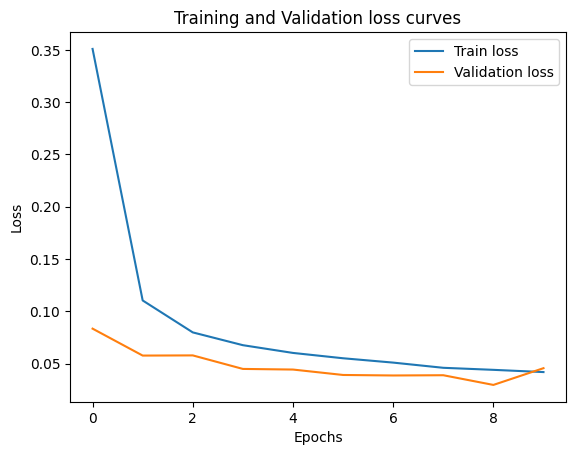

In [20]:
plt.plot(epoch_counter, train_loss_per_epoch, label="Train loss")
plt.plot(epoch_counter, val_loss_per_epoch, label="Validation loss")
plt.title("Training and Validation loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Evaluate the performance

In [21]:
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Evaluating:   0%|          | 0/186 [00:00<?, ?it/s]

Test Loss: 0.033 | Test Acc: 98.86%


Show the matrix

## Coding assignment 2
Download a picture from internet that is among the 1000 classes of the ImageNet dataset labels. Choose five different pre-trained models in torchvision and report the top-1 accuracy related to each model.

Source and make accessible your image using one of the two following approaches:

- Link to the image you have chosen if its available on the web. If the image is in your local machine, you can either upload it in your github repo with the name infer_img_assgn2.
- Alternatively, copy the image to your gdrive and give it permission for everyone with the link (right click the image --> share with google Drive).

Then select five of the twelve main pre-trained models in `TorchVision` that are to be used for classifying images from the fine-grained inter-species data sets. Notice that some models include multiple varieties, so you can select one of those varieties for a particular class.

(10 points)

### Static code 3



#### Step 1. Load pre-trained models

Load up models and inspect names. Note that we use here a slightly more compact approach to printing the model names.

This combines the packages and model loads for simplicity.


In [26]:
import requests
import torchvision
import torch.utils.model_zoo as model_zoo
import torchvision.models as models
from PIL import Image

# model names
model_names = sorted(name for name in models.__dict__ \
                     if name.islower() and not name.startswith("__"))
# print(model_names)
mod_index = np.linspace(start=0, stop=len(model_names), num=20) \
              .astype('int').tolist()
for i in range(len(mod_index[:-1])):
    print(model_names[mod_index[i]:mod_index[i+1]])

['_api', '_meta', '_utils', 'alexnet', 'convnext']
['convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet', 'densenet121']
['densenet161', 'densenet169', 'densenet201', 'detection', 'efficientnet', 'efficientnet_b0']
['efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5']
['efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'get_model']
['get_model_builder', 'get_model_weights', 'get_weight', 'googlenet', 'inception', 'inception_v3']
['list_models', 'maxvit', 'maxvit_t', 'mnasnet', 'mnasnet0_5', 'mnasnet0_75']
['mnasnet1_0', 'mnasnet1_3', 'mobilenet', 'mobilenet_v2', 'mobilenet_v3_large']
['mobilenet_v3_small', 'mobilenetv2', 'mobilenetv3', 'optical_flow', 'quantization', 'regnet']
['regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf']
['regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 

In [45]:
len(mod_index)

20

#### Step 2: transform function

Needed to make your selected image fit with the model


In [28]:
transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
  )])


### Dynamic code - change once

#### Step 3: Load up your image

Remember to replace either the URL with one pointing to the image you want to classify, or if you are downloading your image, comment out the load from url `Image.open` line and uncomment the load from file version, with your correct file path in it.

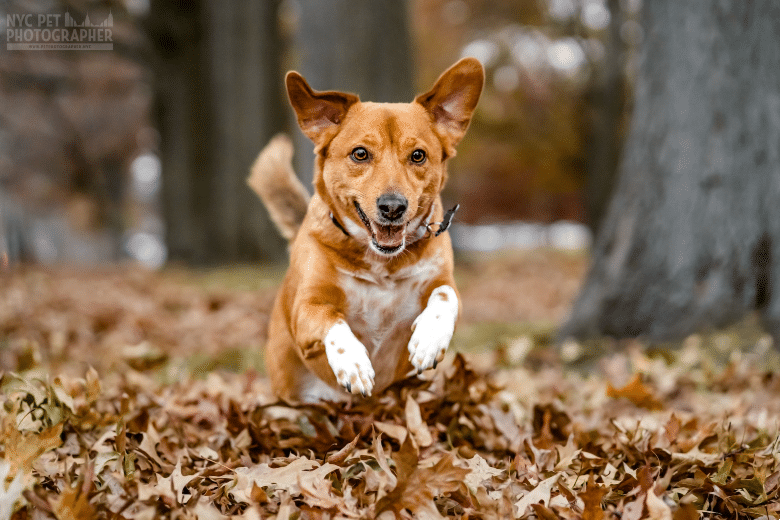

In [39]:
# url = ("https://www.thisdogslife.co/wp-content/uploads/2020/08/" + \
      #  "Dog-Photoshoot-Tips-3.png")
# img = Image.open(requests.get(url, stream=True).raw)
# uncomment this one to load in downloaded image, adjust path as needed
img = Image.open("/content/gdrive/MyDrive/adleo/data/Dog-Photoshoot-Tips-3.png")

img = img.convert("RGB")
img_trans = transform(img)
batch_t = torch.unsqueeze(img_trans, 0)
img  ## this lets us see your image

#### Step 4: Load up class definitions
Use either the downloaded version, or, for the extra 1 point, show the method you used to pull it directly from its url.

Downloaded version

In [62]:
# Change the paths accordingly
drive_path = "/content/gdrive/MyDrive/"
imagenet_class_path = f"{drive_path}/adleo/data/imagenet/imagenet_classes.txt"
with open(imagenet_class_path) as f:
    labels = [line.strip() for line in f.readlines()]

### Assignment code (5X)

Use the spaces below (for Models 1-5) to run each of your 5 selected pre-trained models. The Demo immediately below shows how to do this with `AlexNet`.

#### Demo

In [41]:
# create model objects and look at its internals
alexnet = models.alexnet(weights="DEFAULT")  # model
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Check out the pooling layer and classifier. Note the name of the pooling layers will be different in different models. Please change accordingly.

In [42]:
print(alexnet.avgpool)
print("%" * 20)
print(alexnet.classifier)

AdaptiveAvgPool2d(output_size=(6, 6))
%%%%%%%%%%%%%%%%%%%%
Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


Report the accuracy metrics

In [43]:
alexnet.eval()
out_vec = alexnet(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

torch.Size([1, 1000])
%%%%%%%%%%%%%%%%%%%%


[('dingo, warrigal, warragal, Canis dingo', 82.06270599365234),
 ('basenji', 12.444798469543457),
 ('dhole, Cuon alpinus', 1.0126385688781738),
 ('kelpie', 0.7780499458312988),
 ('Chihuahua', 0.7485387921333313)]



```
# This is formatted as code
```

#### Model 1 GoogleNet

In [60]:
googlenet_model = models.googlenet(weights = "DEFAULT")

In [89]:
print(googlenet_model.fc) # Classifier of the googlenet model.

Linear(in_features=1024, out_features=1000, bias=True)


In [83]:
googlenet_model.eval()
out_vec1 = googlenet_model(batch_t)
print(out_vec1.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

torch.Size([1, 1000])
%%%%%%%%%%%%%%%%%%%%


[('dingo, warrigal, warragal, Canis dingo', 11.157464027404785),
 ('basenji', 6.303183078765869),
 ('Ibizan hound, Ibizan Podenco', 4.649561882019043),
 ('Cardigan, Cardigan Welsh corgi', 3.7800345420837402),
 ('Rhodesian ridgeback', 2.722168207168579)]

#### Model 2 Inception

In [65]:
inception_model = models.inception_v3(weights = "DEFAULT")

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 218MB/s] 


In [69]:
inception_model.fc # Classifier of the inception model

Linear(in_features=2048, out_features=1000, bias=True)

In [91]:
print(inception_model.eval())
out_vec2 = inception_model(batch_t)
print(out_vec2.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

[('dingo, warrigal, warragal, Canis dingo', 11.157464027404785),
 ('basenji', 6.303183078765869),
 ('Ibizan hound, Ibizan Podenco', 4.649561882019043),
 ('Cardigan, Cardigan Welsh corgi', 3.7800345420837402),
 ('Rhodesian ridgeback', 2.722168207168579)]

#### Model 3 ResNet50

In [72]:
resnet50_model = models.resnet50(weights = "DEFAULT")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 217MB/s]


In [92]:
print(resnet50_model.fc) # Classifier of the inception model

Linear(in_features=2048, out_features=1000, bias=True)


In [93]:
resnet50_model.eval()
out_vec3 = resnet50_model(batch_t)
print(out_vec3.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

torch.Size([1, 1000])
%%%%%%%%%%%%%%%%%%%%


[('dingo, warrigal, warragal, Canis dingo', 11.157464027404785),
 ('basenji', 6.303183078765869),
 ('Ibizan hound, Ibizan Podenco', 4.649561882019043),
 ('Cardigan, Cardigan Welsh corgi', 3.7800345420837402),
 ('Rhodesian ridgeback', 2.722168207168579)]

#### Model 4 ResNext101_32X8d

In [73]:
resnext_model = models.resnext101_32x8d(weights = "DEFAULT")

Downloading: "https://download.pytorch.org/models/resnext101_32x8d-110c445d.pth" to /root/.cache/torch/hub/checkpoints/resnext101_32x8d-110c445d.pth
100%|██████████| 340M/340M [00:02<00:00, 168MB/s]


In [99]:
print(resnext_model.fc)

Linear(in_features=2048, out_features=1000, bias=True)


In [94]:
print(resnext_model.eval())
out_vec4 = resnext_model(batch_t)
print(out_vec4.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

[('dingo, warrigal, warragal, Canis dingo', 11.157464027404785),
 ('basenji', 6.303183078765869),
 ('Ibizan hound, Ibizan Podenco', 4.649561882019043),
 ('Cardigan, Cardigan Welsh corgi', 3.7800345420837402),
 ('Rhodesian ridgeback', 2.722168207168579)]

#### Model 5 SqueezeNet


In [75]:
squeezenet_model = models.squeezenet1_0(weights = "DEFAULT")

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 10.3MB/s]


In [79]:
print(squeezenet_model.classifier) # Classifier of the inception model

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Conv2d(512, 1000, kernel_size=(1, 1), stride=(1, 1))
  (2): ReLU(inplace=True)
  (3): AdaptiveAvgPool2d(output_size=(1, 1))
)

In [95]:
print(resnet50_model.eval())
out_vec5 = resnet50_model(batch_t)
print(out_vec5.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

[('dingo, warrigal, warragal, Canis dingo', 11.157464027404785),
 ('basenji', 6.303183078765869),
 ('Ibizan hound, Ibizan Podenco', 4.649561882019043),
 ('Cardigan, Cardigan Welsh corgi', 3.7800345420837402),
 ('Rhodesian ridgeback', 2.722168207168579)]